# Задание 1.1

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use("ggplot")

n = 25

In [68]:
# Задаем выборку

sample = np.random.exponential(scale=1.0, size=25)

sample

array([0.17525171, 0.89993415, 1.01093476, 0.10353128, 0.08060047,
       1.51300552, 1.1151499 , 0.74016232, 0.63593963, 1.63430489,
       0.64722566, 0.56837751, 1.63196651, 0.0645487 , 0.87810717,
       0.23154885, 0.43596372, 0.21841809, 0.23055388, 0.05996902,
       1.48661212, 1.47787892, 0.54882948, 0.07657106, 1.1151083 ])

In [69]:
# Для непрерывных данных мода оценивается через интервалы
hist, bins = np.histogram(sample, bins='auto')
mode_bin_index = np.argmax(hist)
mode_estimate = (bins[mode_bin_index] + bins[mode_bin_index + 1]) / 2

median = sorted(sample)[n // 2] if (n % 2 == 1) else (sorted(sample)[n // 2 - 1] + sorted(sample)[n // 2]) / 2

sample_range = max(sample) - min(sample)

μ3 = np.average((sample - np.average(sample))** 3)
σ = np.sqrt(np.var(sample))
asymmetry_coef = μ3 / σ

print(f"Мода = {mode_estimate}")
print(f"Медиана = {median}")
print(f"Размах выборки = {sample_range}")
print(f"Коэффициент асимметрии = {asymmetry_coef}")


Мода = 0.19116367843954893
Медиана = 0.6359396333251601
Размах выборки = 1.5743358628184365
Коэффициент асимметрии = 0.11519756088541956


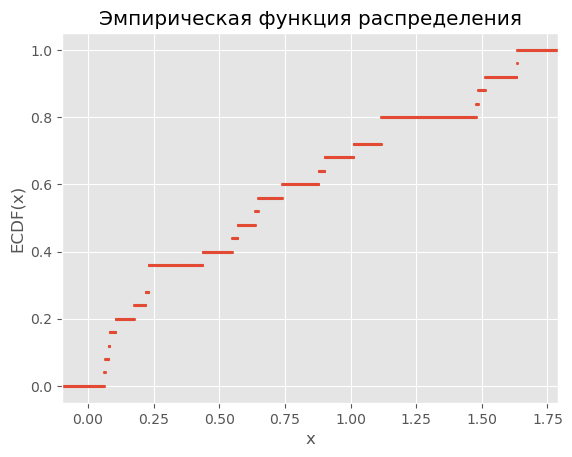

In [70]:
ecdf = ECDF(sample)

x_min = sample.min() - 0.1 * (sample.max() - sample.min())
x_max = sample.max() + 0.1 * (sample.max() - sample.min())

x_values = np.linspace(x_min, x_max, 1000)
y_values = ecdf(x_values)  

plt.scatter(x_values, y_values, s=3)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.title('Эмпирическая функция распределения')
plt.grid(True)
plt.xlim(x_min, x_max)
plt.show()